In [1]:
"""
The project aims to predict the sales at Big Mart.
The demo code below shows predictions based on Scikit-Learn Linear Regression function.
...Improve the model accuracy by including extra hyperparameters on the model below, engineering new features,
using alternate regression models such as Lasso or Ridge Regression.
...May the best coder win.
"""
# linear algebra operations
import numpy as np 
# data handling processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
#Data visualization
import matplotlib.pyplot as plt
#Correlation analysis and data visualization toolbox.
import seaborn as sns
#Popular ML framework and library.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Train.csv', 'Test.csv']


In [2]:
# import data
train = pd.read_csv("../input/Train.csv")
train.head()
test = pd.read_csv("../input/Test.csv")

**Data cleaning**

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#checking the columns in the data
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# Dropping unwanted columns from the data
cols = ['Item_Identifier','Outlet_Type']
train = train.drop(cols, axis=True)

In [6]:
# Viewing the data once more to see the changes.
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,994.7052


In [7]:
# viewing the datatype of the remaining columns in order to start converting them to the right format.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


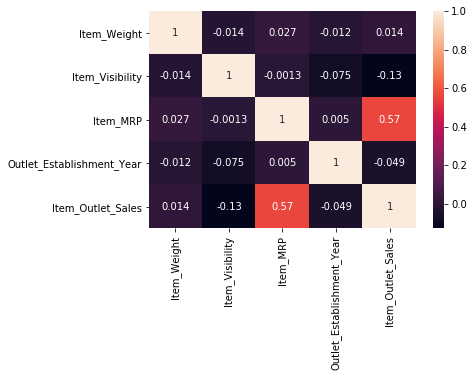

In [8]:
#View the relationships between individual features as well as between the features and the dependent variable.
corr = train.corr()
#Heatmaps show the strenght of relationships between the data features.
sns.heatmap(corr, annot=True)

In [9]:
#Get an overall feel of the dataset.
desc = train.describe() 
desc

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


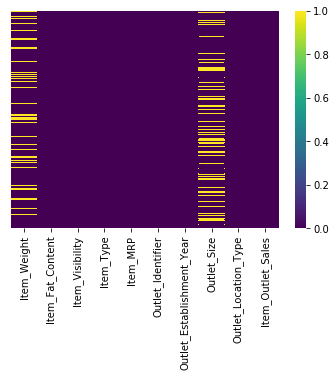

In [10]:
#visualizing the data to detect missing values
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [11]:
#Fill in the missing values in the Out_let size column.
train.Outlet_Size = train.Outlet_Size.fillna('Medium')
train.Outlet_Size.head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

In [12]:
#Missing values in the Item_Weight column are filled by the mean value.
train.Item_Weight = train.Item_Weight.fillna(12.86)
train.Item_Weight.head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

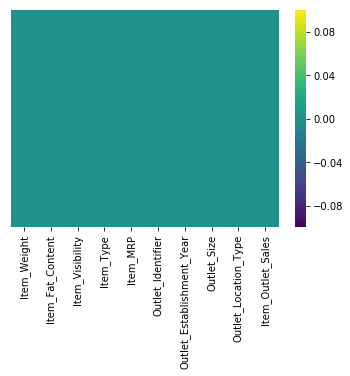

In [13]:
#visualizing the data to detect missing values
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

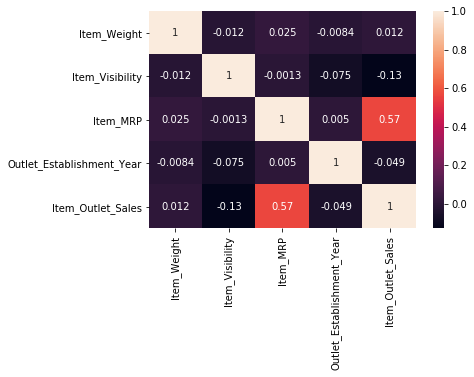

In [14]:
corr = train.corr()
sns.heatmap(corr, annot=True)

In [15]:
#Changing categorical data(Outlet_Location_Type) to numerical data.
train["Outlet_Location_Type"] = pd.Categorical(train["Outlet_Location_Type"])
Outlet_Location_Type_categories = train.Outlet_Location_Type.cat.categories
train["Outlet_Location_Type"] = train.Outlet_Location_Type.cat.codes
train.Outlet_Location_Type.head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int8

In [16]:
#Changing categorical data(Outlet_Size) to numerical data.
train["Outlet_Size"] = pd.Categorical(train["Outlet_Size"])
Outlet_Size_categories = train.Outlet_Size.cat.categories
train["Outlet_Size"] = train.Outlet_Size.cat.codes
train.Outlet_Size.head()

0    1
1    1
2    1
3    1
4    0
Name: Outlet_Size, dtype: int8

In [17]:
# converting item_fat_content to categorical values.
train["Item_Fat_Content"] = pd.Categorical(train["Item_Fat_Content"])
Item_Fat_Content_categories = train.Item_Fat_Content.cat.categories
train["Item_Fat_Content"] = train.Item_Fat_Content.cat.codes
train.Item_Fat_Content.head()

# instead of converting item_fat_content to categorical values, use dummies
#train.Item_Fat_Content = pd.get_dummies(train["Item_Fat_Content"])

0    1
1    2
2    1
3    2
4    1
Name: Item_Fat_Content, dtype: int8

In [18]:
# converting the item_type to categorical values.
train["Item_Type"] = pd.Categorical(train["Item_Type"])
Item_Type_categories = train.Item_Type.cat.categories
train["Item_Type"] = train.Item_Type.cat.codes
train.Item_Type.head()

0     4
1    14
2    10
3     6
4     9
Name: Item_Type, dtype: int8

In [19]:
# converting the outlet_identifier to categorical values
train["Outlet_Identifier"] = pd.Categorical(train["Outlet_Identifier"])
Outlet_Identifier_categories = train.Outlet_Identifier.cat.categories
train["Outlet_Identifier"] = train.Outlet_Identifier.cat.codes
train.Outlet_Identifier.head()

0    9
1    3
2    9
3    0
4    1
Name: Outlet_Identifier, dtype: int8

In [20]:
# converting the outlet_identifier to categorical values
#train["Outlet_Establishment_Year"] = pd.Categorical(train["Outlet_Establishment_Year"])
#Outlet_Establishment_Year_categories = train.Outlet_Establishment_Year.cat.categories
#train["Outlet_Establishment_Year"] = train.Outlet_Establishment_Year.cat.codes
#train.Outlet_Establishment_Year.head()


In [21]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,994.7052


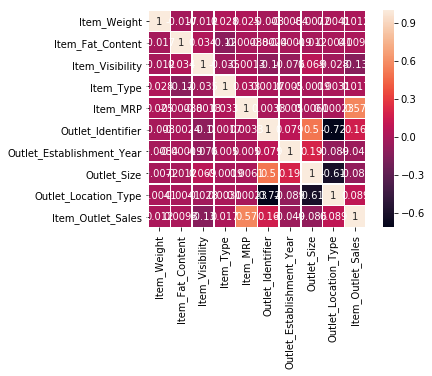

In [22]:
corr = train.corr()
sns.heatmap(corr, annot=True,  square=True, linewidths=.5)

Training the Model

In [23]:
from sklearn.model_selection import train_test_split

# Giving the model X and Y values
X = train.drop(["Item_Outlet_Sales"], axis=1)
Y = train.Item_Outlet_Sales
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [24]:
#Preparing the data for cross-Validation and selecting the features used in training.
#X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Outlet_Location_Type','Outlet_Size', 'Item_Weight']]
#x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [25]:
#sns.heatmap(X)

In [26]:
#Give the regression function an easy name to use.
lr = LinearRegression(n_jobs = -1, normalize = True)
tf = Ridge()
#clf = GradientBoostingRegressor(n_estimators = 200)
# The ensemble model works perfectly..



In [27]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)


In [28]:


lr.fit(x_poly, Y)
pred = lr.predict(x_poly)

#rmse = np.sqrt(mean_squared_error(Y,pred))

#print(rmse)

#calculating mse

mse = np.mean((pred - Y)**2)

In [29]:
mse

1202698.2508531213

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = tf, param_distributions = random_grid)
# Fit the random search model
#rf_random.fit(X,Y)

In [31]:
#Train the model based on the training dataset.
#clf.fit(x_train,y_train)

#lr.fit(x_train,y_train)
#tf.fit(x_train,y_train)

In [32]:
#View the model score using the validation dataset.
#clf.score(x_cv,y_cv)
#print('Linear Regression model: score\n')
#lr.score(x_cv, y_cv)
#print('Ridge Regression model: score\n')
#tf.score(x_cv, y_cv)

In [33]:
#print('Ridge Regression model: score\n')
#tf.score(x_cv, y_cv)

In [34]:

#pred = lr.predict(x_cv)

#calculating mse

#mse = np.mean((pred - y_cv)**2)